<h1>FAKE SOCIAL MEDIA PROFILE DET</h1>

In [1]:
# libraries imported 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

2.10.0


<h1># Load the training dataset</h1>

In [2]:
instagram_df_train=pd.read_csv('insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


<h1># Load the testing data</h1>

In [3]:
instagram_df_test=pd.read_csv('insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [4]:
instagram_df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
instagram_df_train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [6]:
instagram_df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [7]:
instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


<h1>#Performing Exploratory Data Analysis EDA</h1>

In [8]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [9]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [10]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [11]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [12]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [13]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [14]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [15]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [16]:
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

<h1># Perform Data Visualizations</h1>

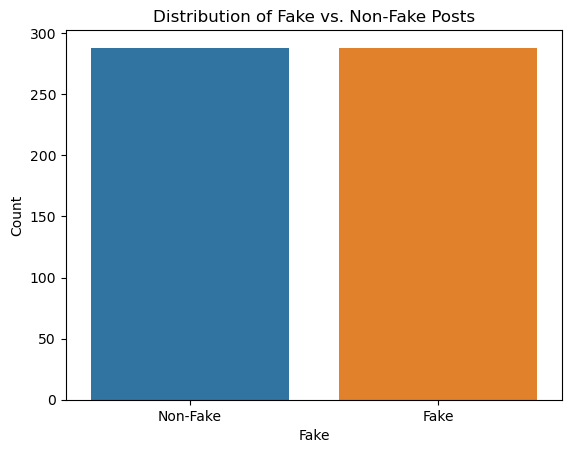

In [17]:
# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fake', data=instagram_df_train)
plt.title('Distribution of Fake vs. Non-Fake Posts')
plt.xlabel('Fake')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fake', 'Fake'])  # Assigning labels to the ticks
plt.show()

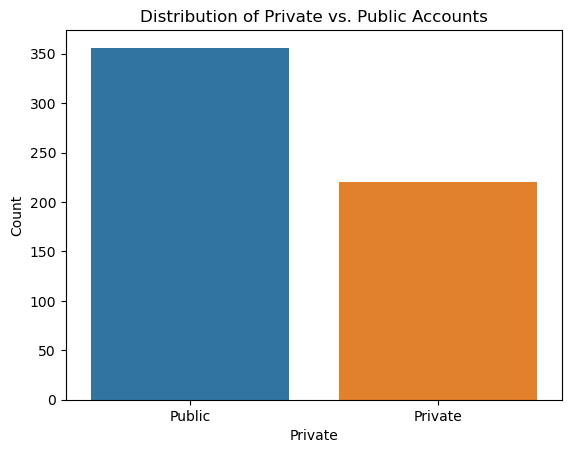

In [18]:
# Visualize the private column data
sns.countplot(x='private', data=instagram_df_train)
plt.title('Distribution of Private vs. Public Accounts')
plt.xlabel('Private')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])  # Assigning labels to the ticks
plt.show()

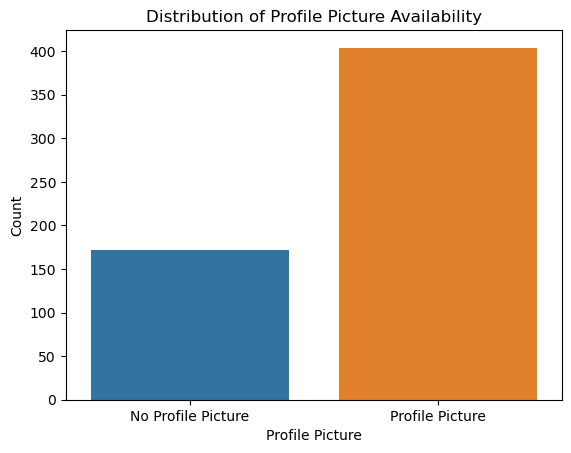

In [19]:
# Visualize the "profile pic" column data
sns.countplot(x='profile pic', data=instagram_df_train)
plt.title('Distribution of Profile Picture Availability')
plt.xlabel('Profile Picture')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Profile Picture', 'Profile Picture'])  # Assigning labels to the ticks
plt.show()

C:\Users\tejna\AppData\Local\Temp\ipykernel_10664\2959907168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])
C:\Users\tejna\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


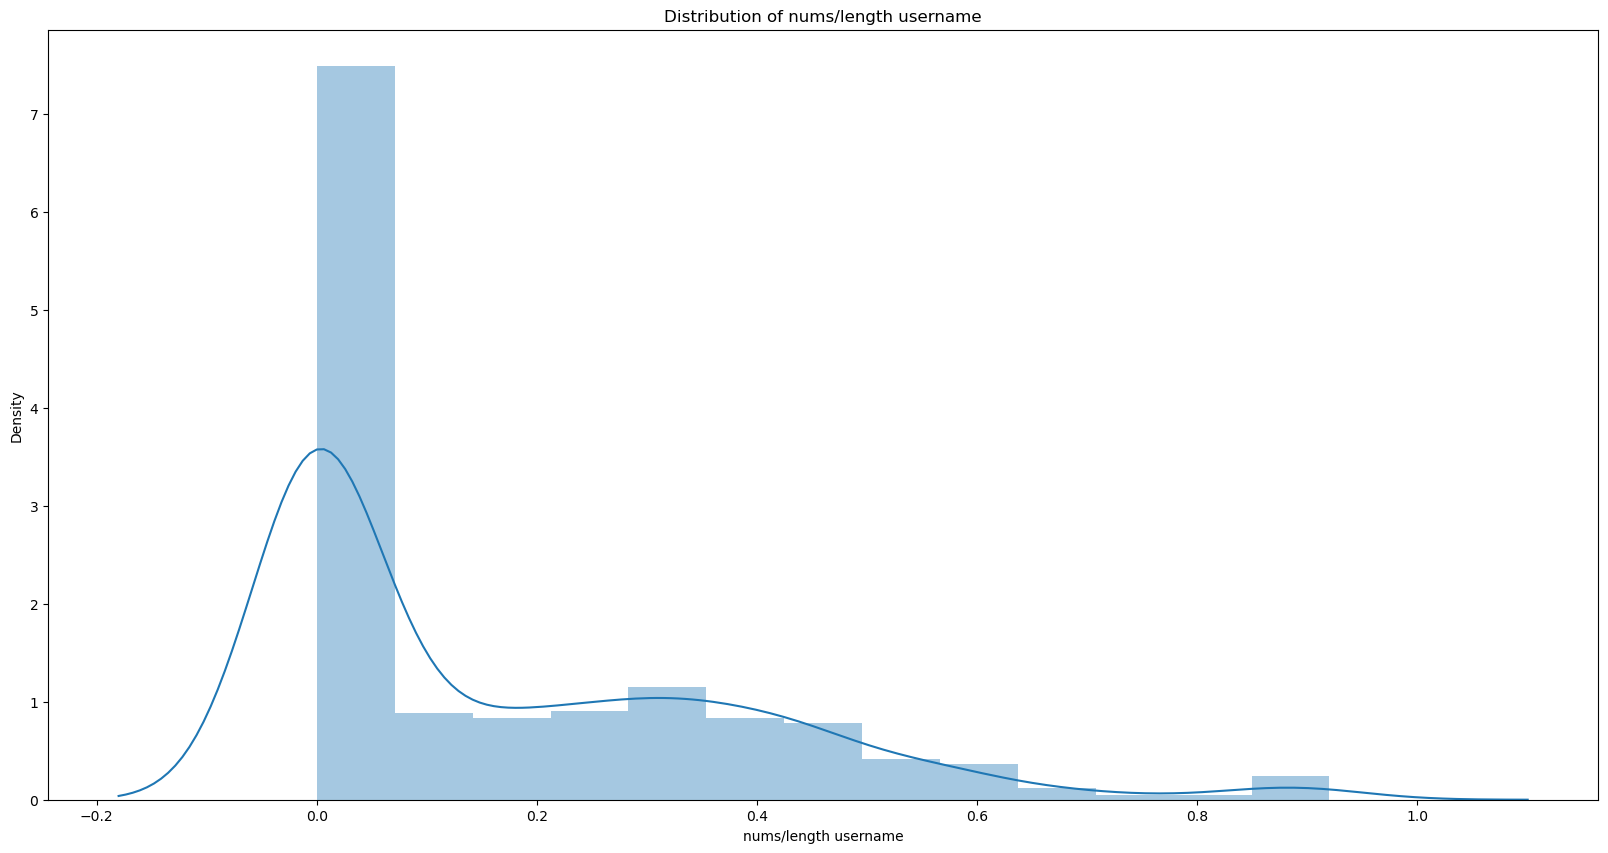

In [20]:
# Visualize the data
plt.figure(figsize=(20, 10))  
sns.distplot(instagram_df_train['nums/length username'])
plt.title('Distribution of nums/length username')
plt.xlabel('nums/length username')
plt.ylabel('Density')
plt.show()

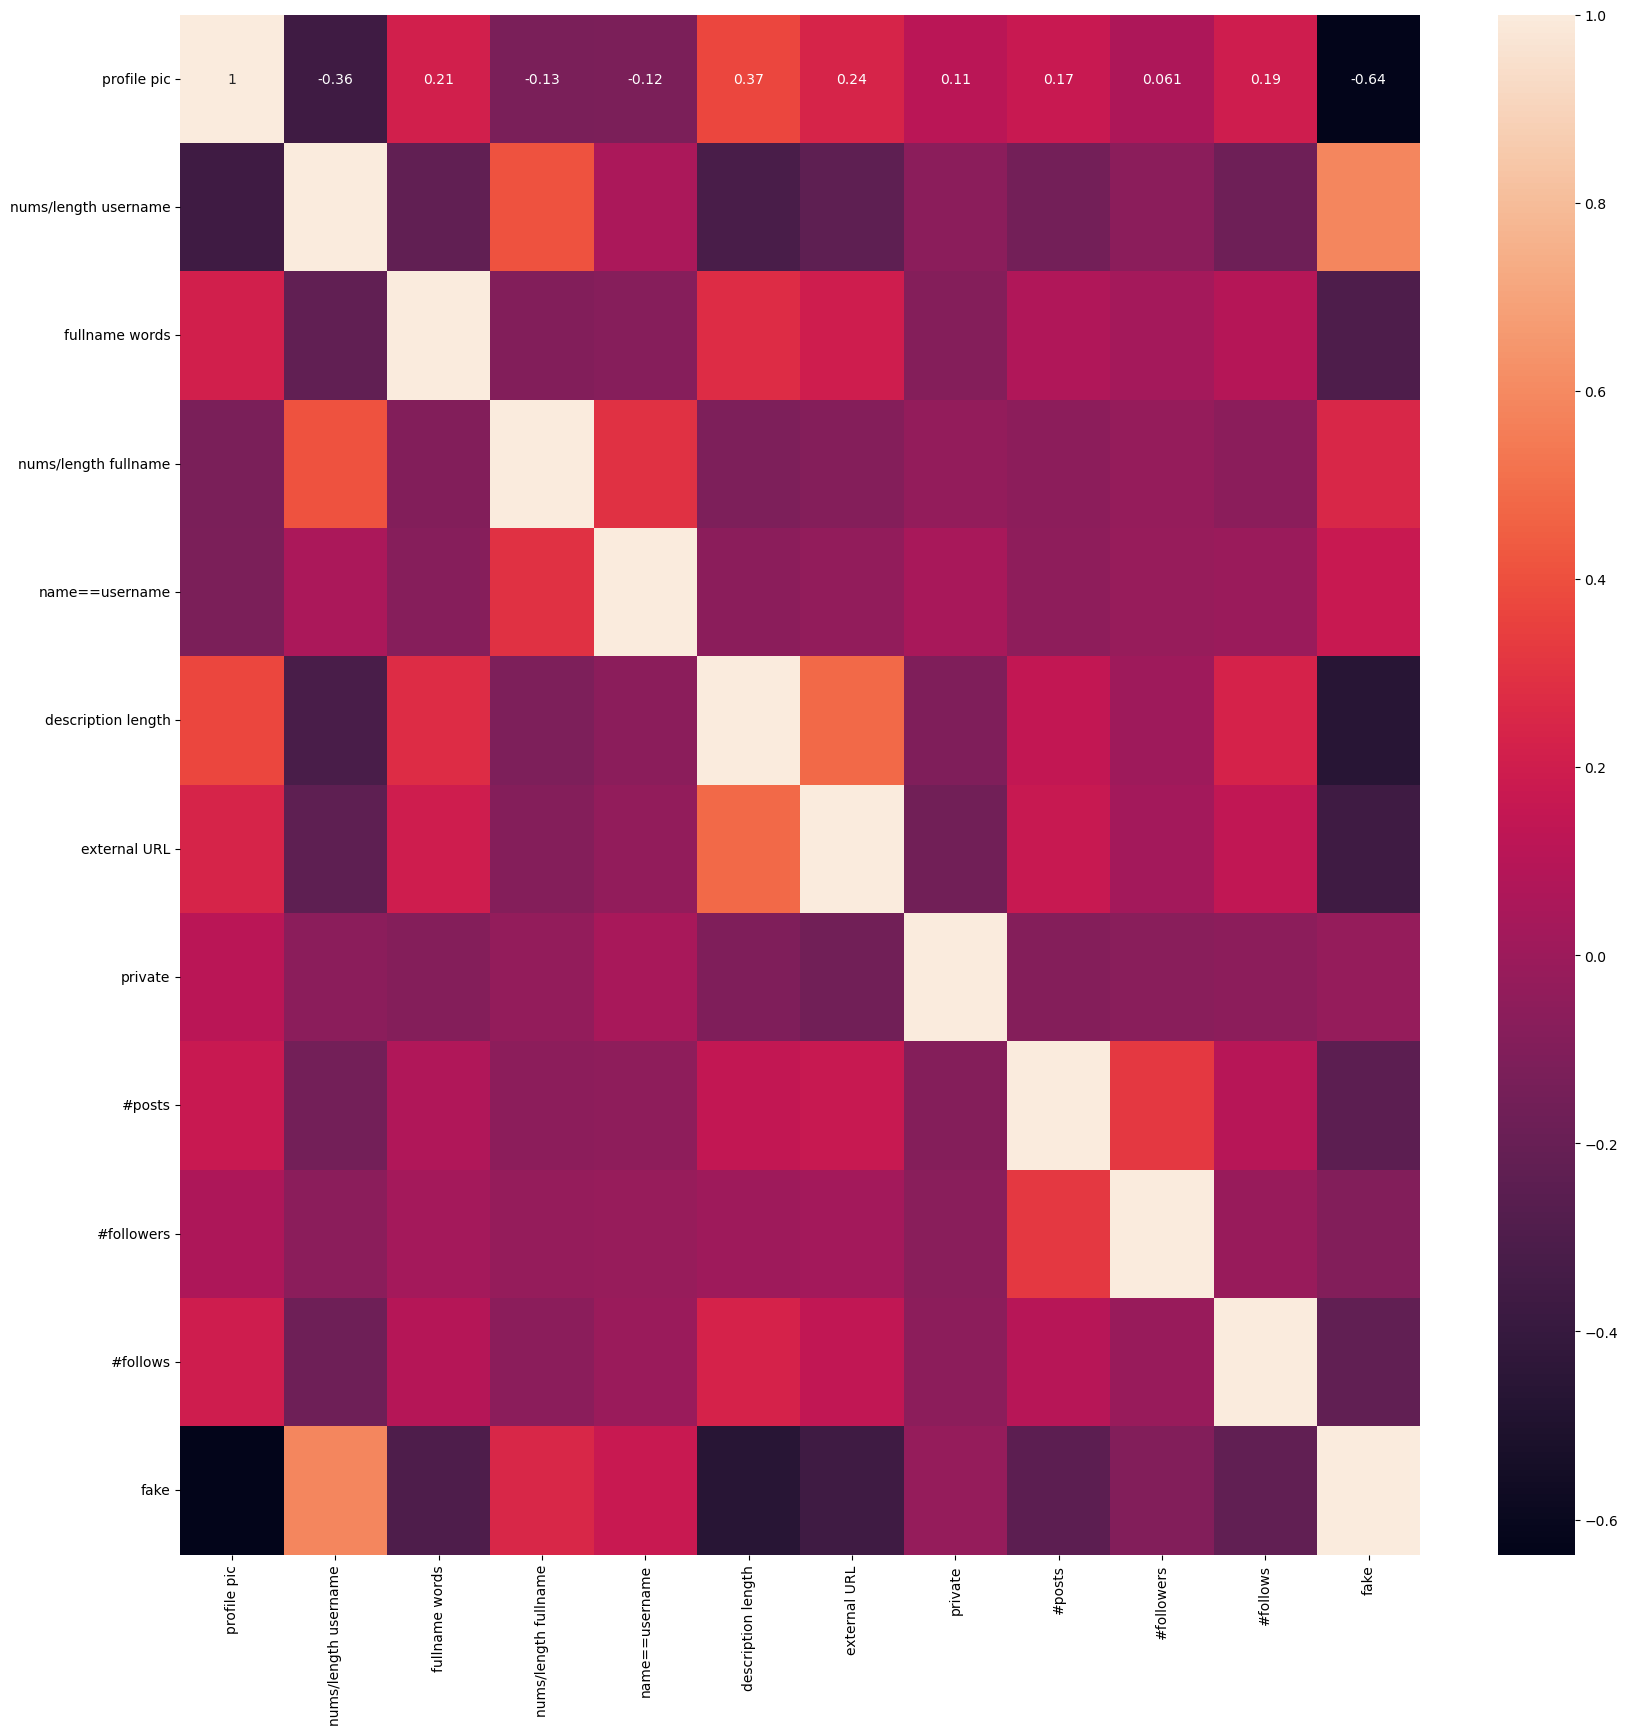

In [21]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
# heatmap for correlation matrix
sns.heatmap(cm, annot=True, ax=ax)
plt.show()

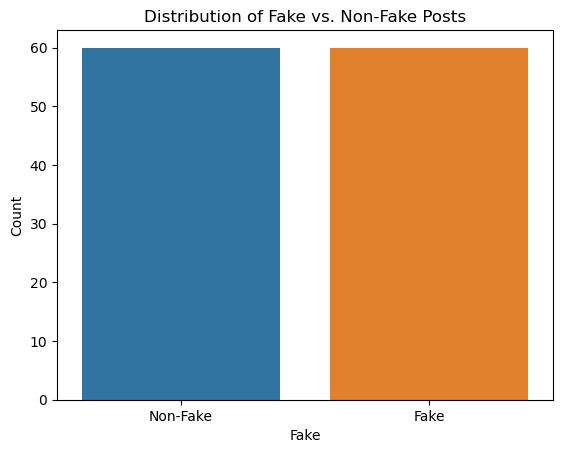

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fake', data=instagram_df_test)
plt.title('Distribution of Fake vs. Non-Fake Posts')
plt.xlabel('Fake')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fake', 'Fake'])  # Assigning labels to the ticks
plt.show()

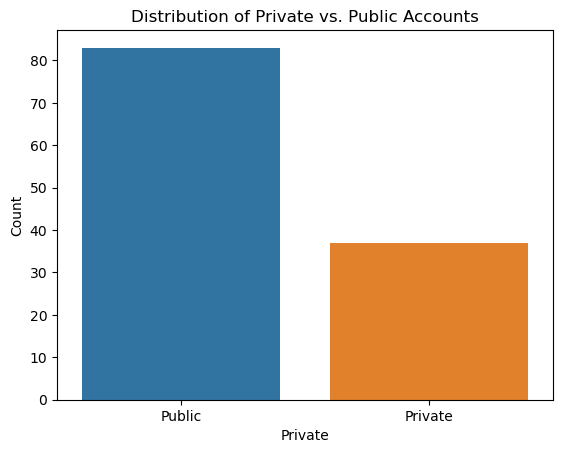

In [23]:
# Visualize the private column data
sns.countplot(x='private', data=instagram_df_test)
plt.title('Distribution of Private vs. Public Accounts')
plt.xlabel('Private')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])  # Assigning labels to the ticks
plt.show()

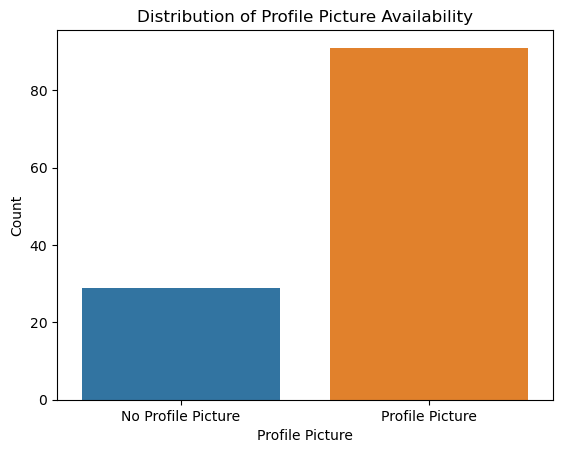

In [24]:
# Visualize the "profile pic" column data
sns.countplot(x='profile pic', data=instagram_df_test)
plt.title('Distribution of Profile Picture Availability')
plt.xlabel('Profile Picture')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Profile Picture', 'Profile Picture'])  # Assigning labels to the ticks
plt.show()

<h1># Preparing Data to Train the Model</h1>

In [25]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [26]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [27]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [28]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [29]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [30]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [99]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [32]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [33]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [34]:
# print the shapes of training and testing datasets 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [35]:
Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
Training_data

82.75862068965517

In [36]:
Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data

17.24137931034483

<h1># Building and Training Deep Training Model</h1>

In [37]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 52        
                                                                 
Total params: 12,077
Trainable params: 12,077
Non-traina

In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

Epoch 1/50
17/17 [==============================] - 3s 58ms/step - loss: 0.5541 - accuracy: 0.7490 - val_loss: 0.3902 - val_accuracy: 0.8966
Epoch 2/50
17/17 [==============================] - 0s 15ms/step - loss: 0.3826 - accuracy: 0.8803 - val_loss: 0.2175 - val_accuracy: 0.8966
Epoch 3/50
17/17 [==============================] - 0s 9ms/step - loss: 0.3056 - accuracy: 0.8919 - val_loss: 0.1959 - val_accuracy: 0.8966
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2678 - accuracy: 0.8900 - val_loss: 0.1749 - val_accuracy: 0.8966
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2377 - accuracy: 0.9112 - val_loss: 0.1650 - val_accuracy: 0.9138
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2448 - accuracy: 0.9054 - val_loss: 0.1676 - val_accuracy: 0.9138
Epoch 7/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2296 - accuracy: 0.9112 - val_loss: 0.1616 - val_accuracy: 0.9138
Epoch 8/50
17/17 [

<h1># Access the Performance of the model</h1>

In [40]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


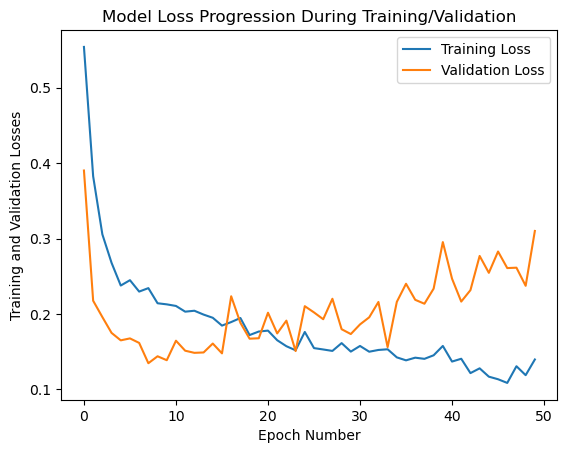

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [42]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [43]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

In [44]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.89      0.85      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



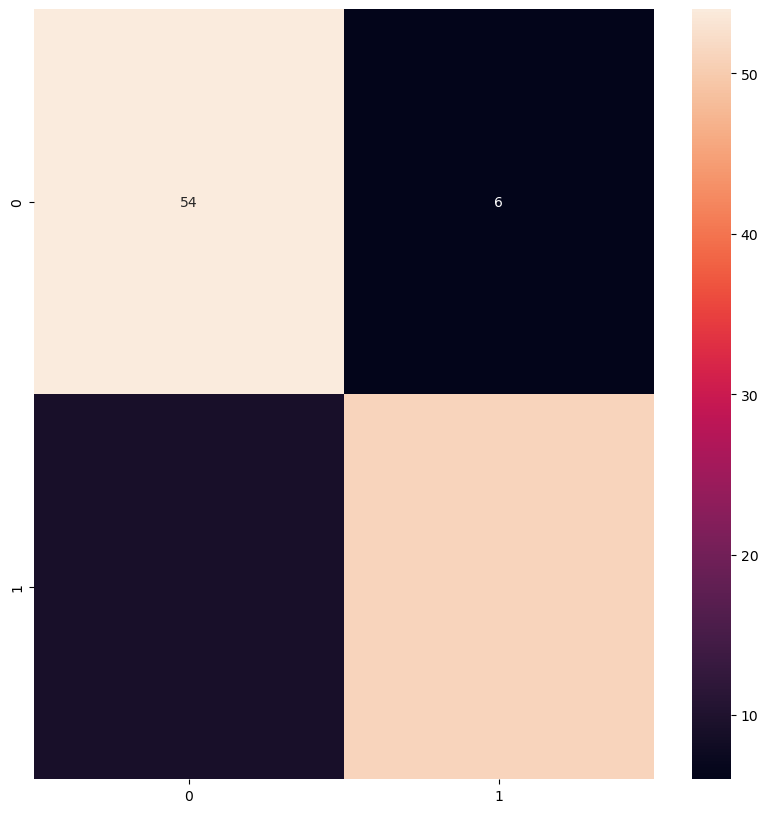

In [45]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

In [46]:
data = {
    'profile pic':1,
    'nums/length username':0.55,
    'fullname words':1,
    'nums/length fullname':0.44,
    'name==username':0,	
    'description length':0,
    'external URL':0,	
    'private':0,
    '#posts':33,	
    '#followers':166,	
    '#follows':596,
}

new_df = pd.DataFrame(data, index=[0])
new_df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.55,1,0.44,0,0,0,0,33,166,596


In [47]:
pred = model.predict(new_df)
pred

1/1 [==============================] - 0s 265ms/step


array([[1., 0.]], dtype=float32)

In [48]:
scaled_new_data = scaler_x.transform(new_df) 
# Scale the new data using the same scaler used for training data

# Predicting using the trained model
predicted_new_data = model.predict(scaled_new_data)
print(predicted_new_data)
# Interpret the prediction
predicted_label = np.argmax(predicted_new_data)  
# Get the index of the predicted class
if predicted_label == 0:
    print("The profile is predicted to be real.")
else:
    print("The profile is predicted to be fake.")

1/1 [==============================] - 0s 51ms/step
[[0.01361782 0.9863821 ]]
The profile is predicted to be fake.


In [49]:
model.save('static/model_ANN.h5')